# Homework A (Bonus - 1 points)
We want to study the impact of discount factor using the endowments (income) in the first and second periods, and interest rate given below on the first and second period consumption, and saving amount. 

y_0 = 1, 
y_1 = 1, 
r = 0.05

Use values from 0.9 to 0.99 with 0.01 increments for beta and create table to show the values of c_0, c_1, a, and utility for each value of beta. Explain how consumption and savings change with the increase in beta. Why?

To solve, you need to insert equations for optimal level of c_0, c_1, a and use the logarithmich utility function to derive the values of c_0, c_1, a, and utility at the optimal level of c_0 and c_1.

In [10]:
# Make graphs appear within the notebook
%matplotlib inline

# Import numerical computations library
import numpy as np

# Import data manipulation library
import pandas as pd
# Import plotting library
import matplotlib.pyplot as plt

# Import minimization function
from scipy.optimize import minimize

# Import optimization function
import scipy.optimize as opt

# Parameters

params = {'y_0':1, 'y_1':1, 'r':0.05, 'beta':0.9}

def discount_impact(β_min=0.9, β_max=0.99, increment=0.01, params=params):
    β_values = np.arange(β_min, β_max+increment, increment)
    c_0_opt_values = []
    c_1_opt_values = []
    a_vlues = []
    U_values = []
    for β in β_values:
        y_0 = params['y_0']
        y_1 = params['y_1']
        r = params['r']
        c_0_opt = 1/(1+β) * (y_0 + y_1/(1+r))
        c_1_opt = β*(1+r)*c_0_opt
        a = β/(1+β) * y_0 - 1/(1+β) * y_1/(1+r)
        U_opt = np.log(c_0_opt) + β*np.log(c_1_opt)
        c_0_opt_values.append(c_0_opt)
        c_1_opt_values.append(c_1_opt)
        a_vlues.append(a)
        U_values.append(U_opt)
    # return table of combined values
    data_table = pd.DataFrame({'β': β_values, 'c_0_opt': c_0_opt_values, 'c_1_opt': c_1_opt_values, 'stock of asset':a_vlues, 'U_opt': U_values})
    return data_table

<Axes: title={'center': 'Optimal Consumption vs. Discount Factor β'}, xlabel='Discount Factor β', ylabel='Optimal Consumption'>

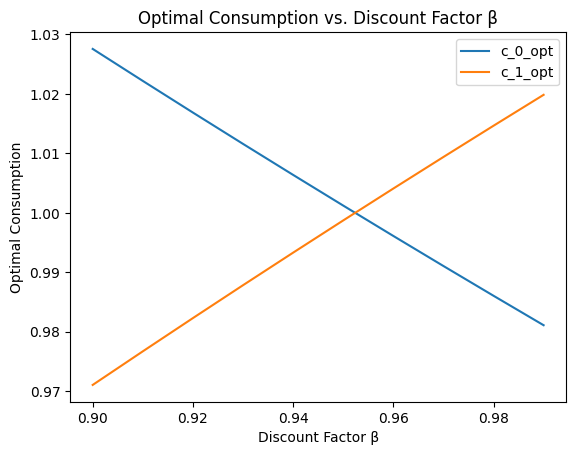

In [12]:
task_A_results = discount_impact()
task_A_results.head()
task_A_results.plot(x='β', y=['c_0_opt', 'c_1_opt'], title='Optimal Consumption vs. Discount Factor β', ylabel='Optimal Consumption', xlabel='Discount Factor β')